# Latihan 3.1 Burden

1. $x_0 = 0, x_1 = 0.6, x_2 = 0.9$. $P_1$ dan $P_2$? $f(x) = \cos(x)$. Hitung error absolut untuk $f(0.45)$

In [1]:
using Plots
using Polynomials

In [2]:
x = [0, 0.6, 0.9]
f(x) = cos(x)
y = f.(x)
nilai_eksak = f(0.45)

0.9004471023526769

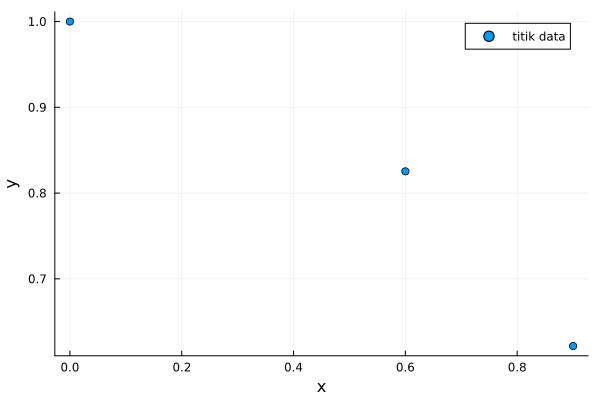

In [22]:
scatter(x, y, xlabel="x", ylabel="y", label="titik data")

### $P_2$

In [4]:
V = [x[i]^j for i=1:length(x), j=0:length(x)-1]

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 1.0  0.6  0.36
 1.0  0.9  0.81

In [5]:
a = V \ y
a

3-element Vector{Float64}:
  1.0
 -0.032455188275307086
 -0.4310868670142706

In [6]:
p = Polynomial(a)

Polynomial(1.0 - 0.032455188275307086*x - 0.4310868670142706*x^2)

### Mencari error absolut

In [7]:
error_abs = abs(p(0.45) - f(0.45))

0.0023470276469549356

### $P_1$

In [13]:
u = x[1:length(x)-1]
v = f.(u)

2-element Vector{Float64}:
 1.0
 0.8253356149096783

In [14]:
V = [u[i]^j for i=1:length(u), j=0:length(u)-1]

2×2 Matrix{Float64}:
 1.0  0.0
 1.0  0.6

In [15]:
a = V \ v

2-element Vector{Float64}:
  1.0
 -0.29110730848386945

In [16]:
p = Polynomial(a)

Polynomial(1.0 - 0.29110730848386945*x)

In [17]:
p(0.45)

0.8690017111822588

### Mencari error absolut untuk $P_1$

In [20]:
error_abs = abs(f(0.45) - p(0.45))

0.03144539117041811

Jadi, $P_2$ memiliki error absolut yang lebih kecil dari $P_1$

## Menggunakan interpolasi Lagrange

In [24]:
function Lagrange_basis(x_data)
    n = length(x_data)
    L = zeros(n, n)
    for i in 1:n
        for j in 1:n
            if i == j
                L[i, j] = 1.0
            else 
                L[i, j] = 0.0
            end
        end
    end
    return L
end

Lagrange_basis (generic function with 1 method)

In [25]:
function poly_Lagrange(x, x_data, koef)
    n = length(x_data)
    hasil = 0.0
    for i in 1:n
        term = koef[i]
        for j in 1:n
            if i != j
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
            end
        end
        hasil += term
    end
    return hasil
end

poly_Lagrange (generic function with 1 method)

In [27]:
x = [0, 0.6, 0.9]
f(x) = cos(x)
y = f.(x);

In [28]:
V = Lagrange_basis(x)
V

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [29]:
a = V \ y
a

3-element Vector{Float64}:
 1.0
 0.8253356149096783
 0.6216099682706644

In [30]:
p = poly_Lagrange

poly_Lagrange (generic function with 1 method)

In [32]:
p(0.45, x, a)

0.898100074705722

### Error absolut untuk $P_2$

In [36]:
error_abs = abs(p(0.45, x, a) - f(0.45))

0.0023470276469549356

### Error abslut untuk $P_1$

## Interpolasi Newton

Dengan masalah yang sama, konstruksi interpolasi Newton $P_1$ dan $P_2$ untuk mencari error absolut seperti contoh di atas.

* Nama: 
* NIM: 

In [49]:
# Buat code untuk interpolasi Newton

# http://homepages.math.uic.edu/~jan/mcs471/divdifpol.pdf


In [47]:
# Cari error absolut untuk P1

In [48]:
# Cari error absolut untuk P2